In [1]:
import matplotlib.pyplot as plt
from torch.nn.functional import one_hot

from segmentation_model import SegmentationModel
import numpy as np
from torch.utils.data import DataLoader
from image_dataset import *
import torch

C:\Users\remil\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The method load, loads a picture and applies the segmentation to it. It then returns x, y, y_hat.

In [42]:
checkpoint = "epoch=299-step=20400.ckpt"
dir = "data/"
def load(picture_name):

    model = SegmentationModel.load_from_checkpoint(checkpoint_path=checkpoint)
    #
    # # disable randomness, dropout, etc...
    model.eval()

    picture = np.load(dir +  picture_name).astype(np.float32)

    x, y = picture[:3], picture[3]

    x = np.array([x])
    x = torch.tensor(x)
    y = torch.tensor(y)

    # predict with the model
    y_hat = model(x)

    y_hat = y_hat.detach().numpy()
    y = y.detach().numpy()
    y_hat = np.argmax(y_hat, axis=1)[0]
    x = x.numpy()
    x = x.transpose(0, 2, 3, 1)[0]

    return x, y, y_hat

Loading our best and worst predictions

In [45]:
best = load("52_a.npy")
worst = load("33_a.npy")

Function to plot

In [50]:
def plot_comparison(x, y, y_hat):
    predicted_mask = y_hat
    reference_mask = y
    image = x

    fig, axs = plt.subplots(1, 3)

    for i, title in zip(range(3), ["image", "reference", "predicted"]):
        axs[i].imshow(image)
        axs[i].set_title(title)
        axs[i].axis("off")
        if i == 1:
            axs[i].imshow(reference_mask, vmax=reference_mask.max(), alpha=0.7)
        if i == 2:
            axs[i].imshow(predicted_mask, vmax=reference_mask.max(), alpha=0.7)

    plt.tight_layout()
    plt.show()

This is the plot for our best prediction (highest Dice score)

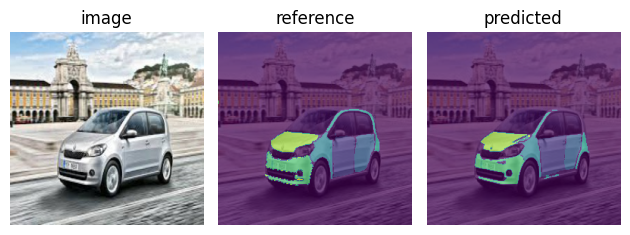

In [51]:
plot_comparison(best[0], best[1], best[2])

This is the plot for our worst prediction (lowest Dice score)

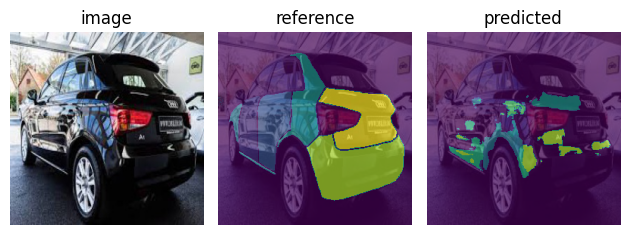

In [52]:
plot_comparison(worst[0], worst[1], worst[2])